# LOADING THE DATASET
            

In [1255]:


import pandas as pd
df=pd.read_csv('C:/Users/User/Desktop/Revathi/ab_test_results_hosted.csv')

In [1256]:
df.head()

,user_id,week_starting,date,hosted_sessions,zero_sessions,time_in_session,flyer_clicks,user_status_of_week,birth_date,device_platform,country,state_province,test_treatment
0,29295b1a-5bd8-42ee-9d87-8826ff6f9d71,2020-09-21,2020-09-23,13,0,13202,22,returned,42679,Mobile,Canada,QC,control
1,29295b1a-5bd8-42ee-9d87-8826ff6f9d71,2020-09-21,2020-09-23,13,0,13202,0,returned,42679,Mobile,Canada,QC,control
2,da25a790-3ed8-43cd-9fef-cefe48d18156,2020-09-21,2020-09-24,4,0,10048,20,returned,43308,Mobile,Canada,ON,test
3,b0ee6e6f-f74a-475a-b72a-f5495b167352,2020-09-21,2020-09-24,30,1,9001,10,returned,43721,Mobile,Canada,ON,control
4,b0ee6e6f-f74a-475a-b72a-f5495b167352,2020-09-21,2020-09-23,20,0,8265,16,returned,43721,Mobile,Canada,ON,control


In [1257]:
df

,user_id,week_starting,date,hosted_sessions,zero_sessions,time_in_session,flyer_clicks,user_status_of_week,birth_date,device_platform,country,state_province,test_treatment
0,29295b1a-5bd8-42ee-9d87-8826ff6f9d71,2020-09-21,2020-09-23,13,0,13202,22,returned,42679,Mobile,Canada,QC,control
1,29295b1a-5bd8-42ee-9d87-8826ff6f9d71,2020-09-21,2020-09-23,13,0,13202,0,returned,42679,Mobile,Canada,QC,control
2,da25a790-3ed8-43cd-9fef-cefe48d18156,2020-09-21,2020-09-24,4,0,10048,20,returned,43308,Mobile,Canada,ON,test
3,b0ee6e6f-f74a-475a-b72a-f5495b167352,2020-09-21,2020-09-24,30,1,9001,10,returned,43721,Mobile,Canada,ON,control
4,b0ee6e6f-f74a-475a-b72a-f5495b167352,2020-09-21,2020-09-23,20,0,8265,16,returned,43721,Mobile,Canada,ON,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83263,1af68371-1eee-4905-a175-a12e257df7d6,2020-09-21,2020-09-26,0,0,0,0,returned,42801,Mobile,Canada,ON,control
83264,1af68371-1eee-4905-a175-a12e257df7d6,2020-09-21,2020-09-21,0,0,0,0,returned,42801,Mobile,Canada,ON,control
83265,5a3861a8-8e3a-4b58-9ce3-04a50d101415,2020-09-21,2020-09-26,0,0,0,0,returned,43587,Mobile,United States,IL,test
83266,5a3861a8-8e3a-4b58-9ce3-04a50d101415,2020-09-21,2020-09-27,0,0,0,0,returned,43587,Mobile,United States,IL,test


In [1258]:
df.shape

(83268, 13)

# check for null values

In [1259]:
df.isnull().sum()

user_id                0
week_starting          0
date                   0
hosted_sessions        0
zero_sessions          0
time_in_session        0
flyer_clicks           0
user_status_of_week    0
birth_date             0
device_platform        0
country                0
state_province         0
test_treatment         0
dtype: int64

In [1260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83268 entries, 0 to 83267
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              83268 non-null  object
 1   week_starting        83268 non-null  object
 2   date                 83268 non-null  object
 3   hosted_sessions      83268 non-null  int64 
 4   zero_sessions        83268 non-null  int64 
 5   time_in_session      83268 non-null  int64 
 6   flyer_clicks         83268 non-null  int64 
 7   user_status_of_week  83268 non-null  object
 8   birth_date           83268 non-null  int64 
 9   device_platform      83268 non-null  object
 10  country              83268 non-null  object
 11  state_province       83268 non-null  object
 12  test_treatment       83268 non-null  object
dtypes: int64(5), object(8)
memory usage: 8.3+ MB


In [1261]:


# Count the number of rows for each group
test_group_count = df[df['test_treatment'] == 'test'].shape[0]
control_group_count = df[df['test_treatment'] == 'control'].shape[0]

# Print the counts
print(f'Number of rows in the test group: {test_group_count}')
print(f'Number of rows in the control group: {control_group_count}')


Number of rows in the test group: 41473
Number of rows in the control group: 41795


## Remove duplicate values

In [1262]:


# Check for duplicate rows based on all columns
duplicates = df[df.duplicated()]

# Check for duplicate rows based on specific columns
# For example, check for duplicates based on 'user_id' column only
duplicates_user_id = df[df.duplicated(subset=['user_id'])]

# Print the duplicate rows
#print("\nDuplicate Rows based on 'user_id':")
#print(duplicates_user_id)

# If you want to create a new DataFrame from the duplicate rows based on 'user_id':
df_duplicate_user_id = df[df.duplicated(subset=['user_id'], keep=False)]


df_duplicate_user_id.head()


,user_id,week_starting,date,hosted_sessions,zero_sessions,time_in_session,flyer_clicks,user_status_of_week,birth_date,device_platform,country,state_province,test_treatment
0,29295b1a-5bd8-42ee-9d87-8826ff6f9d71,2020-09-21,2020-09-23,13,0,13202,22,returned,42679,Mobile,Canada,QC,control
1,29295b1a-5bd8-42ee-9d87-8826ff6f9d71,2020-09-21,2020-09-23,13,0,13202,0,returned,42679,Mobile,Canada,QC,control
2,da25a790-3ed8-43cd-9fef-cefe48d18156,2020-09-21,2020-09-24,4,0,10048,20,returned,43308,Mobile,Canada,ON,test
3,b0ee6e6f-f74a-475a-b72a-f5495b167352,2020-09-21,2020-09-24,30,1,9001,10,returned,43721,Mobile,Canada,ON,control
4,b0ee6e6f-f74a-475a-b72a-f5495b167352,2020-09-21,2020-09-23,20,0,8265,16,returned,43721,Mobile,Canada,ON,control


## Removing duplicates based on all columns not on user_id , because user_id gets repated for different dates 

In [1263]:
# Remove duplicate rows based on all columns
df_no_duplicates = df.drop_duplicates()

# Print the shape of the new DataFrame without duplicates to verify
print("Shape of DataFrame without duplicates:", df_no_duplicates.shape)

df = df_no_duplicates


Shape of DataFrame without duplicates: (81835, 13)


In [1264]:


# Count the number of rows for each group
test_group_count = df[df['test_treatment'] == 'test'].shape[0]
control_group_count = df[df['test_treatment'] == 'control'].shape[0]

# Print the counts
print(f'Number of rows in the test group: {test_group_count}')
print(f'Number of rows in the control group: {control_group_count}')


Number of rows in the test group: 40968
Number of rows in the control group: 40867


## Check for inconsistent data

In [1265]:
print(df.describe())

       hosted_sessions  zero_sessions  time_in_session  flyer_clicks  \
count     81835.000000   81835.000000     81835.000000  81835.000000   
mean          1.756241       0.068027       361.764648      1.719717   
std           1.541491       0.286696       552.222126      2.741670   
min           0.000000       0.000000         0.000000      0.000000   
25%           1.000000       0.000000        40.000000      0.000000   
50%           1.000000       0.000000       168.000000      1.000000   
75%           2.000000       0.000000       455.000000      2.000000   
max          30.000000      17.000000     13202.000000     50.000000   

         birth_date  
count  81835.000000  
mean   43576.018562  
std      419.037181  
min    41644.000000  
25%    43328.000000  
50%    43688.000000  
75%    43902.000000  
max    44101.000000  


In [1266]:
columns_to_drop = ['birth_date', 'state_province', 'device_platform']
df = df.drop(columns=columns_to_drop)

### check if any user_ids that belong to both "test" and "control" groups

In [1267]:

# Group by user_id and count unique test treatments
user_id_counts = df.groupby("user_id")["test_treatment"].nunique()

# Find user_ids that belong to both "test" and "control" groups
user_ids_both_groups = user_id_counts[user_id_counts == 2].index.tolist()

# Display user_ids that belong to both groups
print("User IDs belonging to both 'test' and 'control' groups:")
print(user_ids_both_groups)

User IDs belonging to both 'test' and 'control' groups:
[]


### Checks for bad entry, where all other columns are same but flyer_clicks is different where one of the values is 0 and other is 22, but same hosted_session and time_in_session

### This can bais the analysis by favouring control set 

In [1268]:

desired_rows = df[df['time_in_session'] == 13202]

# Print the resulting DataFrame as a table
print(desired_rows.to_string(index=False))

                             user_id week_starting       date  hosted_sessions  zero_sessions  time_in_session  flyer_clicks user_status_of_week country test_treatment
29295b1a-5bd8-42ee-9d87-8826ff6f9d71    2020-09-21 2020-09-23               13              0            13202            22            returned  Canada        control
29295b1a-5bd8-42ee-9d87-8826ff6f9d71    2020-09-21 2020-09-23               13              0            13202             0            returned  Canada        control


In [1269]:
desired_rows

,user_id,week_starting,date,hosted_sessions,zero_sessions,time_in_session,flyer_clicks,user_status_of_week,country,test_treatment
0,29295b1a-5bd8-42ee-9d87-8826ff6f9d71,2020-09-21,2020-09-23,13,0,13202,22,returned,Canada,control
1,29295b1a-5bd8-42ee-9d87-8826ff6f9d71,2020-09-21,2020-09-23,13,0,13202,0,returned,Canada,control


In [1270]:
duplicate_columns = ['user_id', 'date', 'week_starting', 'hosted_sessions', 'time_in_session', 'zero_sessions','user_status_of_week', 'country', 'test_treatment']
mask = df.duplicated(subset=duplicate_columns) #, keep='last'

In [1271]:
# Create a mask to identify rows where flyer_clicks is greater than 0
mask = df['flyer_clicks'] > 0

# Filter the DataFrame to keep rows where flyer_clicks is greater than 0 or there are no duplicates
df = df[mask | ~df.duplicated(subset=duplicate_columns, keep=False)]

# Print the resulting DataFrame
#print(filtered_df)


In [1272]:
desired_rows = filtered_df[filtered_df['time_in_session'] == 13202] #or 2610

# Print the resulting DataFrame
print(desired_rows)

                                    user_id week_starting        date  \
58981  29295b1a-5bd8-42ee-9d87-8826ff6f9d71    2020-09-21  2020-09-23   

       hosted_sessions  zero_sessions  time_in_session  flyer_clicks  \
58981               13              0            13202            22   

      user_status_of_week country test_treatment  
58981            returned  Canada        control  


In [1273]:
desired_rows

,user_id,week_starting,date,hosted_sessions,zero_sessions,time_in_session,flyer_clicks,user_status_of_week,country,test_treatment
58981,29295b1a-5bd8-42ee-9d87-8826ff6f9d71,2020-09-21,2020-09-23,13,0,13202,22,returned,Canada,control


In [1274]:
df.shape

(78466, 10)

In [1275]:
# Count the number of rows for each group
test_group_count = df[df['test_treatment'] == 'test'].shape[0]
control_group_count = df[df['test_treatment'] == 'control'].shape[0]

# Print the counts
print(f'Number of rows in the test group: {test_group_count}')
print(f'Number of rows in the control group: {control_group_count}')


Number of rows in the test group: 40137
Number of rows in the control group: 38329


In [1276]:
df['hosted_sessions'] = df['hosted_sessions'] - df['zero_sessions']

## Outlier detection

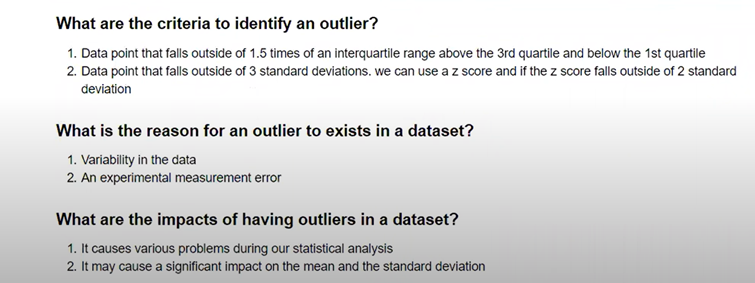

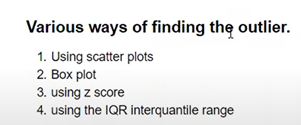

### Outlier scenario

A scenario where 'time_in_session' is 13202 seconds, 'flyer_clicks' is 22, and 'hosted_sessions' is 13 can be unusual and may indicate a few different possibilities:

Data Entry Error: One possibility is that there might be a data entry error or data quality issue in the dataset. Such extreme values could be due to a mistake during data collection or recording.

Browsing Behavior: It's also possible that the user in question had an exceptionally long session (13202 seconds) during which they clicked on flyers (22 times) and interacted with the platform in various ways. This could indicate a very engaged or active user.

Bot or Automated Activity: Extreme values like these could be a result of automated activity or bot behavior rather than typical user behavior. Bots can generate unusual patterns of interactions and may spend a lot of time on a platform, leading to high 'time_in_session' and 'flyer_clicks' values.

Outlier: These values could be legitimate outliers in the dataset. Outliers can occur naturally in data due to various factors, and they may or may not have a specific explanation.

Testing or Development Activity: In some cases, activities like testing or development work on a platform can result in unusual data points that don't represent typical user behavior.

In [1277]:
df.describe()

,hosted_sessions,zero_sessions,time_in_session,flyer_clicks
count,78466.000000,78466.000000,78466.000000,78466.000000
mean,1.685724,0.069444,345.417799,1.793554
std,1.494449,0.283729,531.113843,2.776160
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,37.000000,0.000000
50%,1.000000,0.000000,159.000000,1.000000
75%,2.000000,0.000000,434.000000,2.000000
max,29.000000,17.000000,13202.000000,50.000000


hosted_sessions:
The maximum value of 30 is significantly higher than the 75th percentile value of 2. This suggests the presence of potential outliers on the higher end.

time_in_session:
The maximum value of 13,202 is much larger than the 75th percentile value of 450. This indicates the presence of potential outliers on the higher end.

flyer_clicks:
The maximum value of 50 is considerably higher than the 75th percentile value of 2. This suggests potential outliers on the higher end.

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_in_session'>

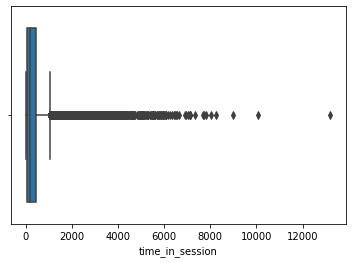

In [1278]:
import seaborn as sns
sns.boxplot(df['time_in_session'])

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hosted_sessions'>

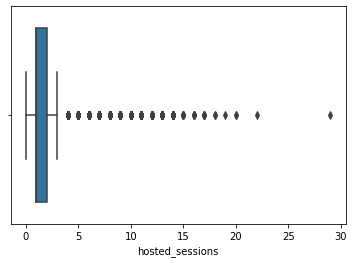

In [1279]:
import seaborn as sns
sns.boxplot(df['hosted_sessions'])

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='flyer_clicks'>

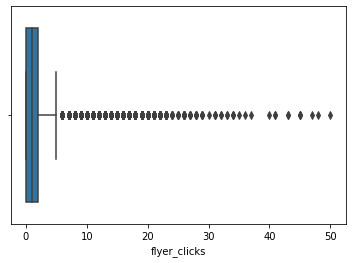

In [1280]:
import seaborn as sns
sns.boxplot(df['flyer_clicks'])

#### Tried using z-score and IQR ( too aggressive in removing practically possible data points)

### Removing outliers detected using box plotwhile also considering practical significance in columns like time_in_session, flyer_clicks and hosted_session

In [1281]:
df.shape

(78466, 10)

In [1282]:
df.shape

(78466, 10)

In [1283]:
df['time_in_session'].mean()

345.41779879183343

In [1284]:
df = df[df['time_in_session'] <= 2000]

In [1285]:
df = df[df['flyer_clicks'] <= 20]

In [1286]:
df = df[df['hosted_sessions'] <= 10]

In [1287]:
df.describe()

,hosted_sessions,zero_sessions,time_in_session,flyer_clicks
count,76804.000000,76804.000000,76804.000000,76804.000000
mean,1.613926,0.067562,293.523619,1.641633
std,1.320910,0.279885,368.869803,2.363182
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,35.000000,0.000000
50%,1.000000,0.000000,152.000000,1.000000
75%,2.000000,0.000000,407.000000,2.000000
max,10.000000,17.000000,2000.000000,20.000000


In [1297]:
# Calculate the number of flyer clicks in the test group
flyer_clicks_test = df[df['test_treatment'] == 'test']['flyer_clicks'].sum()

# Calculate the count of unique users in the test group
unique_users_test = df[df['test_treatment'] == 'test']['user_id'].nunique()

# Compute the click-through rate (CTR) for the test group
ctr_test = (flyer_clicks_test / unique_users_test) * 100
ctr_test

635.3353353353353

In [1298]:
# Calculate the number of flyer clicks in the test group
flyer_clicks_test = df[df['test_treatment'] == 'control']['flyer_clicks'].sum()

# Calculate the count of unique users in the test group
unique_users_test = df[df['test_treatment'] == 'control']['user_id'].nunique()

# Compute the click-through rate (CTR) for the test group
ctr_test = (flyer_clicks_test / unique_users_test) * 100
ctr_test

630.0462869792715

In [1289]:
df['flyer_clicks_ratio']

1763      2.0
1764      9.0
1767     10.0
1768      2.0
1769      5.0
         ... 
83263     0.0
83264     0.0
83265     0.0
83266     0.0
83267     0.0
Name: flyer_clicks_ratio, Length: 76804, dtype: float64

In [1187]:
df.shape

(76804, 10)

In [1188]:
# Count the number of rows for each group
test_group_count = df[df['test_treatment'] == 'test'].shape[0]
control_group_count = df[df['test_treatment'] == 'control'].shape[0]

# Print the counts
print(f'Number of rows in the test group: {test_group_count}')
print(f'Number of rows in the control group: {control_group_count}')


Number of rows in the test group: 39300
Number of rows in the control group: 37504


In [1189]:
df.head()

,user_id,week_starting,date,hosted_sessions,zero_sessions,time_in_session,flyer_clicks,user_status_of_week,country,test_treatment
0,07102080-992a-4275-a09d-46694f16bc32,2020-09-21,2020-09-21,1,0,12,0,returned,Canada,control
1,07102080-992a-4275-a09d-46694f16bc32,2020-09-21,2020-09-25,3,0,136,2,returned,Canada,control
2,07102080-992a-4275-a09d-46694f16bc32,2020-09-21,2020-09-23,1,0,164,2,returned,Canada,control
3,07102080-992a-4275-a09d-46694f16bc32,2020-09-21,2020-09-24,1,0,75,1,returned,Canada,control
4,07102080-992a-4275-a09d-46694f16bc32,2020-09-21,2020-09-27,2,0,227,0,returned,Canada,control


In [1252]:
import scipy.stats as stats

# Define the data for control and test groups
control_data = df[df['test_treatment'] == 'control']['hosted_sessions']
test_data = df[df['test_treatment'] == 'test']['hosted_sessions']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(control_data, test_data, equal_var=False)

# Define a significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine statistical significance
if p_value < alpha:
    print("The difference in 'hosted_sessions' is statistically significant.")
else:
    print("The difference in 'hosted_sessions' is not statistically significant.")


The difference in 'hosted_sessions' is statistically significant.


In [1253]:
t_stat

-19.905471241723834

In [1194]:
import scipy.stats as stats

# Define the data for control and test groups
control_data = df[df['test_treatment'] == 'control']['flyer_clicks']
test_data = df[df['test_treatment'] == 'test']['flyer_clicks']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(control_data, test_data, equal_var=False)

# Define a significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine statistical significance
if p_value < alpha:
    print("The difference in 'flyer_clicks' is statistically significant.")
else:
    print("The difference in 'flyer_clicks' is not statistically significant.")


The difference in 'flyer_clicks' is statistically significant.


In [1195]:
import scipy.stats as stats

# Define the data for control and test groups
control_data = df[df['test_treatment'] == 'control']['time_in_session']
test_data = df[df['test_treatment'] == 'test']['time_in_session']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(control_data, test_data, equal_var=False)

# Define a significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine statistical significance
if p_value < alpha:
    print("The difference in 'time_in_session' is statistically significant.")
else:
    print("The difference in 'time_in_session' is not statistically significant.")

print(t_stat)
print(p_value)

The difference in 'time_in_session' is statistically significant.
3.3972354795196855
0.000681050948567183


In [1196]:
import scipy.stats as stats

# Define the data for control and test groups
control_data = df[df['test_treatment'] == 'control']['zero_sessions']
test_data = df[df['test_treatment'] == 'test']['zero_sessions']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(control_data, test_data, equal_var=False)

# Define a significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine statistical significance
if p_value < alpha:
    print("The difference in 'time_in_session' is statistically significant.")
else:
    print("The difference in 'time_in_session' is not statistically significant.")

The difference in 'time_in_session' is not statistically significant.


t-statistic (t-value): A larger absolute t-value indicates a larger difference between the groups. In your case, a t-statistic of approximately 3.397 suggests a significant difference between the groups.

p-value:  A small p-value (typically below a predefined significance level, such as 0.05) indicates that the observed difference is unlikely to be due to random chance. In your case, a p-value of approximately 0.000681 is quite small, suggesting that the observed difference is statistically significant.

In summary, a t-statistic of 3.397 and a small p-value of 0.000681 suggest that there is a statistically significant difference between your control and treatment groups, and this difference is unlikely to have occurred by random chance alone. This indicates that the treatment group likely performed differently from the control group, and the observed difference is statistically meaningful.

In [1197]:
data=df

### Analysing the independant variables

In [1254]:
import pandas as pd

# Calculate the mean values for 'hosted_sessions' for test and control groups
mean_hosted_sessions_test = df[df['test_treatment'] == 'test']['hosted_sessions'].mean()
mean_hosted_sessions_control = df[df['test_treatment'] == 'control']['hosted_sessions'].mean()

# Calculate the mean values for 'time_in_session' for test and control groups
mean_time_in_session_test = df[df['test_treatment'] == 'test']['time_in_session'].mean()
mean_time_in_session_control = df[df['test_treatment'] == 'control']['time_in_session'].mean()

# Calculate the mean values for 'flyer_clicks' for test and control groups
mean_flyer_clicks_test = df[df['test_treatment'] == 'test']['flyer_clicks'].mean()
mean_flyer_clicks_control = df[df['test_treatment'] == 'control']['flyer_clicks'].mean()

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Metric': ['Hosted Sessions', 'Time in Session', 'Flyer Clicks'],
    'Mean (Test Group)': [mean_hosted_sessions_test, mean_time_in_session_test, mean_flyer_clicks_test],
    'Mean (Control Group)': [mean_hosted_sessions_control, mean_time_in_session_control, mean_flyer_clicks_control]
})

# Determine which group performed better based on the metrics
better_performance = []

if mean_hosted_sessions_test > mean_hosted_sessions_control:
    better_performance.append("Test group for Hosted Sessions")
else:
    better_performance.append("Control group for Hosted Sessions")

if mean_time_in_session_test > mean_time_in_session_control:
    better_performance.append("Test group for Time in Session")
else:
    better_performance.append("Control group for Time in Session")

if mean_flyer_clicks_test > mean_flyer_clicks_control:
    better_performance.append("Test group for Flyer Clicks")
else:
    better_performance.append("Control group for Flyer Clicks")

results_df['Better Performance'] = better_performance

# Print the results DataFrame
print(results_df)


            Metric  Mean (Test Group)  Mean (Control Group)  \
0  Hosted Sessions           1.705878              1.517571   
1  Time in Session         289.103181            298.155743   
2     Flyer Clicks           1.615013              1.669529   

                  Better Performance  
0     Test group for Hosted Sessions  
1  Control group for Time in Session  
2     Control group for Flyer Clicks  


In [1199]:
results_df

,Metric,Mean (Test Group),Mean (Control Group),Better Performance
0,Hosted Sessions,1.705878,1.517571,Test group for Hosted Sessions
1,Time in Session,289.103181,298.155743,Control group for Time in Session
2,Flyer Clicks,1.615013,1.669529,Control group for Flyer Clicks


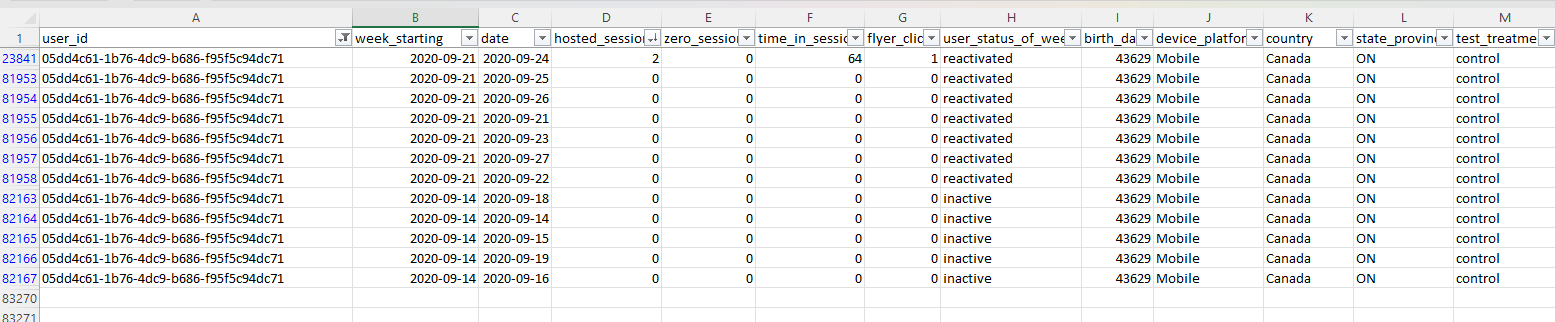

In [1200]:
df.head()

,user_id,week_starting,date,hosted_sessions,zero_sessions,time_in_session,flyer_clicks,user_status_of_week,country,test_treatment
0,07102080-992a-4275-a09d-46694f16bc32,2020-09-21,2020-09-21,1,0,12,0,returned,Canada,control
1,07102080-992a-4275-a09d-46694f16bc32,2020-09-21,2020-09-25,3,0,136,2,returned,Canada,control
2,07102080-992a-4275-a09d-46694f16bc32,2020-09-21,2020-09-23,1,0,164,2,returned,Canada,control
3,07102080-992a-4275-a09d-46694f16bc32,2020-09-21,2020-09-24,1,0,75,1,returned,Canada,control
4,07102080-992a-4275-a09d-46694f16bc32,2020-09-21,2020-09-27,2,0,227,0,returned,Canada,control


In [1201]:
import pandas as pd

# Assuming you have your data in a DataFrame called 'df'

# Define a function to check if a user's status changed from churned or inactive to returned/reactivated
def status_changed(row, grouped):
    # Get the user's data for this week
    user_data = grouped.get_group(row['user_id'])

    # Check if the user was churned or inactive before
    churned_or_inactive = user_data[(user_data['week_starting'] < row['week_starting']) &
                                    ((user_data['user_status_of_week'] == 'churned') |
                                     (user_data['user_status_of_week'] == 'inactive'))]

    # Check if the user's status changed to returned or reactivated
    returned_or_reactivated = user_data[(user_data['week_starting'] == row['week_starting']) &
                                        ((user_data['user_status_of_week'] == 'returned') |
                                         (user_data['user_status_of_week'] == 'reactivated'))]

    return len(churned_or_inactive) > 0 and len(returned_or_reactivated) > 0

# Convert 'week_starting' and 'date' columns to datetime format
df['week_starting'] = pd.to_datetime(df['week_starting'])
df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by 'user_id' and 'week_starting'
df.sort_values(by=['user_id', 'week_starting'], inplace=True)

# Group the data by 'user_id'
grouped = df.groupby('user_id')

# Apply the status_changed function to each row to check for status changes
df['status_changed'] = df.apply(lambda row: status_changed(row, grouped), axis=1)

# Filter rows where status changed
changed_status_df = df[df['status_changed']]

# Print the users whose status changed
print(changed_status_df[['user_id', 'week_starting', 'user_status_of_week']])



KeyboardInterrupt: 

In [ ]:
import pandas as pd

# Assuming you have your data in a DataFrame called 'df'

# Convert 'week_starting' and 'date' columns to datetime format
df['week_starting'] = pd.to_datetime(df['week_starting'])
df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by 'user_id', 'test_treatment', 'week_starting', and 'date'
df.sort_values(by=['user_id', 'test_treatment', 'week_starting', 'date'], inplace=True)

# Define a function to check if a user's status changed from churned or inactive to returned/reactivated
def status_changed(row, grouped):
    # Get the user's data for this week and treatment group
    user_data = grouped.get_group((row['user_id'], row['test_treatment']))

    # Check if the user was churned or inactive before
    churned_or_inactive = user_data[(user_data['week_starting'] < row['week_starting']) &
                                    ((user_data['user_status_of_week'] == 'churned') |
                                     (user_data['user_status_of_week'] == 'inactive'))]

    # Check if the user's status changed to returned or reactivated
    returned_or_reactivated = user_data[(user_data['week_starting'] == row['week_starting']) &
                                        ((user_data['user_status_of_week'] == 'returned') |
                                         (user_data['user_status_of_week'] == 'reactivated'))]

    return len(churned_or_inactive) > 0 and len(returned_or_reactivated) > 0

# Group the data by 'user_id' and 'test_treatment'
grouped = df.groupby(['user_id', 'test_treatment'])

# Apply the status_changed function to each row to check for status changes within each group
df['status_changed'] = df.apply(lambda row: status_changed(row, grouped), axis=1)

# Filter rows where status changed
changed_status_df = df[df['status_changed']]

# Print the user with all columns who has converted in Control
control_users = changed_status_df[changed_status_df['test_treatment'] == 'control']
print("Users who converted in Control:")
print(control_users['user_id'].count())

# Print the user with all columns who has converted in Test
test_users = changed_status_df[changed_status_df['test_treatment'] == 'test']
print("\n Number of Users who converted in Test:")
#print(test_users)

print(test_users['user_id'].count())



In [ ]:
import pandas as pd

# Assuming you have your data in a DataFrame called 'df'

# Convert 'week_starting' and 'date' columns to datetime format
df['week_starting'] = pd.to_datetime(df['week_starting'])
df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by 'user_id', 'test_treatment', 'week_starting', and 'date'
df.sort_values(by=['user_id', 'test_treatment', 'week_starting', 'date'], inplace=True)

# Define a function to check if a user's status changed from churned or inactive to returned/reactivated
def status_changed(row, grouped):
    # Get the user's data for this week and treatment group
    user_data = grouped.get_group((row['user_id'], row['test_treatment']))

    # Check if the user was churned or inactive before
    churned_or_inactive = user_data[(user_data['week_starting'] < row['week_starting']) &
                                    ((user_data['user_status_of_week'] == 'churned') |
                                     (user_data['user_status_of_week'] == 'inactive'))]

    # Check if the user's status changed to returned or reactivated
    returned_or_reactivated = user_data[(user_data['week_starting'] == row['week_starting']) &
                                        ((user_data['user_status_of_week'] == 'returned') |
                                         (user_data['user_status_of_week'] == 'reactivated'))]

    return len(churned_or_inactive) > 0 and len(returned_or_reactivated) > 0

# Group the data by 'user_id' and 'test_treatment'
grouped = df.groupby(['user_id', 'test_treatment'])

# Apply the status_changed function to each row to check for status changes within each group
df['status_changed'] = df.apply(lambda row: status_changed(row, grouped), axis=1)

# Filter rows where status changed
changed_status_df = df[df['status_changed']]

# Count the users who converted in Control and Test
control_users_count = control_users['user_id'].count()
test_users_count = test_users['user_id'].count()

# Create a DataFrame to store the counts
counts_df = pd.DataFrame({'Control Users Count who converted ': [control_users_count],
                          'Test Users Count who converted': [test_users_count]})

# Print the counts DataFrame
print(counts_df)


In [ ]:
# Create a DataFrame to store the counts
counts_df = pd.DataFrame({'Control Users Count who converted from churned/inactive to returned/reactivated': [control_users_count],
                          'Test Users Count who converted from churned/inactive to returned/reactivated': [test_users_count]})

# Print the counts DataFrame
print(counts_df)


In [1071]:
counts_df

,Control Users Count who converted from churned/inactive to returned/reactivated,Test Users Count who converted from churned/inactive to returned/reactivated
0,160,178


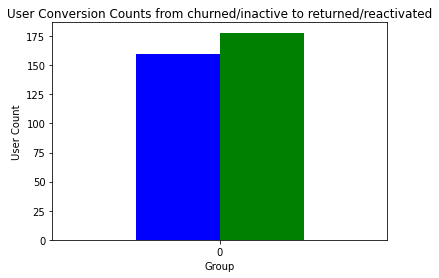

In [1072]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame to store the counts
counts_df = pd.DataFrame({'Control Users Count who converted from churned/inactive to returned/reactivated': [control_users_count],
                          'Test Users Count who converted from churned/inactive to returned/reactivated': [test_users_count]})

# Plot the counts as a bar chart
counts_df.plot(kind='bar', rot=0, color=['blue', 'green'], legend=False)

# Set labels and title
plt.xlabel('Group')
plt.ylabel('User Count')
plt.title('User Conversion Counts from churned/inactive to returned/reactivated')

# Show the plot
plt.show()


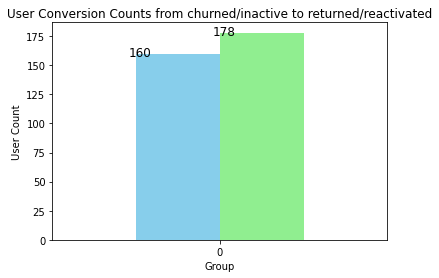

In [1078]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame to store the counts
counts_df = pd.DataFrame({'Control Users Count': [control_users_count],
                          'Test Users Count': [test_users_count]})

# Plot the counts as a bar chart with custom colors
ax = counts_df.plot(kind='bar', rot=0, color=['skyblue', 'lightgreen'], legend=False)

# Set labels and title
plt.xlabel('Group')
plt.ylabel('User Count')
plt.title('User Conversion Counts from churned/inactive to returned/reactivated')

# Display the counts as labels on top of the bars
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 20., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 1),
                textcoords='offset points')

# Show the plot
plt.show()


In [983]:
print(test_users['user_id'].count())

178


In [982]:
print(control_users['user_id'].count())

160


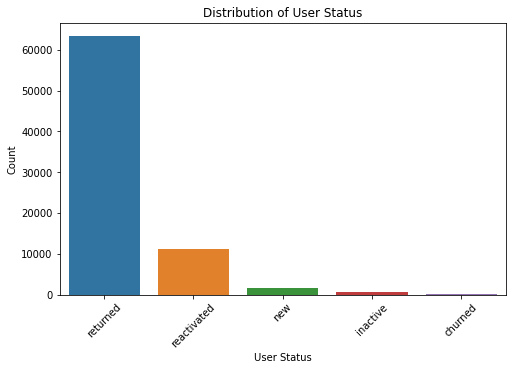

In [1202]:
# Count unique values for categorical columns

import seaborn as sns
categorical_summary = data['user_status_of_week'].value_counts()



# Bar plot for user_status_of_week
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='user_status_of_week')
plt.title('Distribution of User Status')
plt.xlabel('User Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [1203]:
data=df

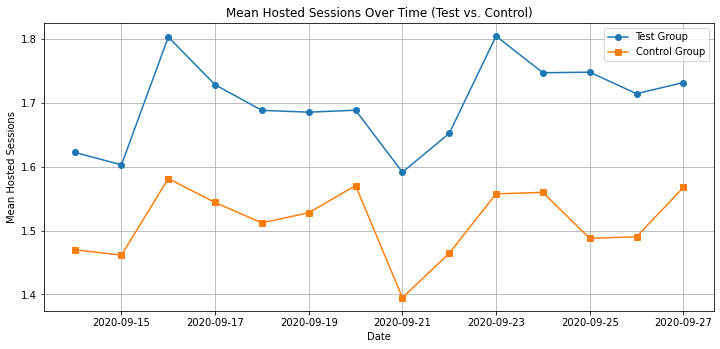

In [1204]:
import matplotlib.pyplot as plt

# Convert 'date' and 'week_starting' columns to datetime
data['date'] = pd.to_datetime(data['date'])
data['week_starting'] = pd.to_datetime(data['week_starting'])

# Separate data into 'test' and 'control' groups
test_data = data[data['test_treatment'] == 'test']
control_data = data[data['test_treatment'] == 'control']

# Define the numerical columns you want to analyze
numerical_columns = ['hosted_sessions', 'time_in_session', 'flyer_clicks']

# Group and aggregate data by 'week_starting,' 'date,' and 'test_treatment'
test_grouped = test_data.groupby(['week_starting', 'date'])[numerical_columns].mean().reset_index()
control_grouped = control_data.groupby(['week_starting', 'date'])[numerical_columns].mean().reset_index()
# Data Visualization for all numerical columns
plt.figure(figsize=(12, 18))

# Plot for hosted_sessions
plt.subplot(3, 1, 1)
plt.plot(test_grouped['date'], test_grouped['hosted_sessions'], label='Test Group', marker='o')
plt.plot(control_grouped['date'], control_grouped['hosted_sessions'], label='Control Group', marker='s')
plt.xlabel('Date')
plt.ylabel('Mean Hosted Sessions')
plt.title('Mean Hosted Sessions Over Time (Test vs. Control)')
plt.legend()
plt.grid(True)




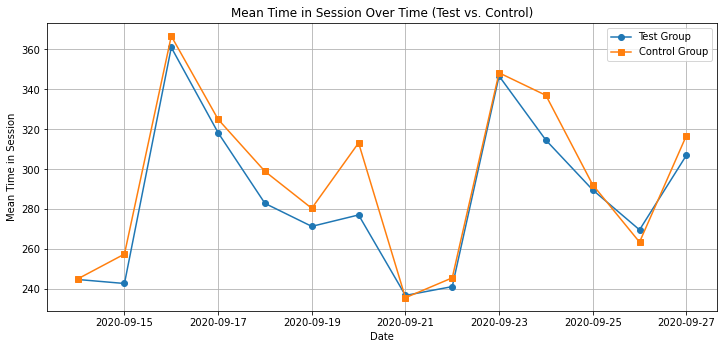

In [1205]:
# Plot for time_in_session
# Data Visualization for all numerical columns
plt.figure(figsize=(12, 18))
plt.subplot(3, 1, 2)
plt.plot(test_grouped['date'], test_grouped['time_in_session'], label='Test Group', marker='o')
plt.plot(control_grouped['date'], control_grouped['time_in_session'], label='Control Group', marker='s')
plt.xlabel('Date')
plt.ylabel('Mean Time in Session')
plt.title('Mean Time in Session Over Time (Test vs. Control)')
plt.legend()
plt.grid(True)






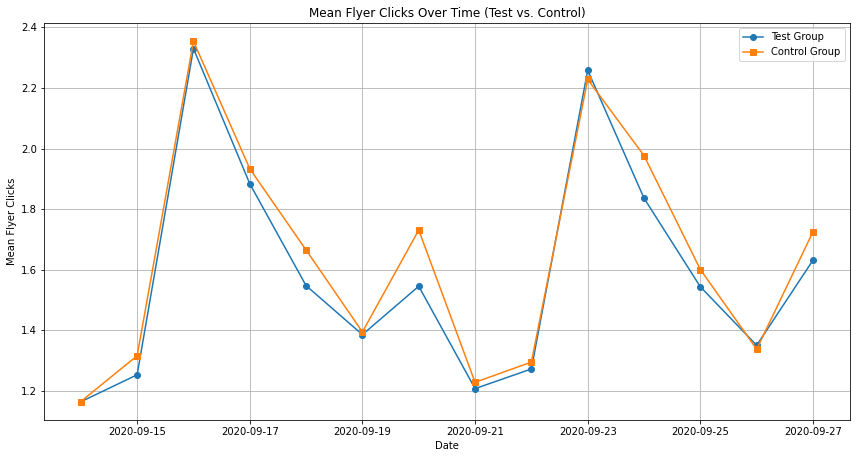

In [1206]:
# Plot for flyer_clicks
# Data Visualization for all numerical columns
plt.figure(figsize=(12, 18))
plt.subplot(3, 1, 3)
plt.plot(test_grouped['date'], test_grouped['flyer_clicks'], label='Test Group', marker='o')
plt.plot(control_grouped['date'], control_grouped['flyer_clicks'], label='Control Group', marker='s')
plt.xlabel('Date')
plt.ylabel('Mean Flyer Clicks')
plt.title('Mean Flyer Clicks Over Time (Test vs. Control)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


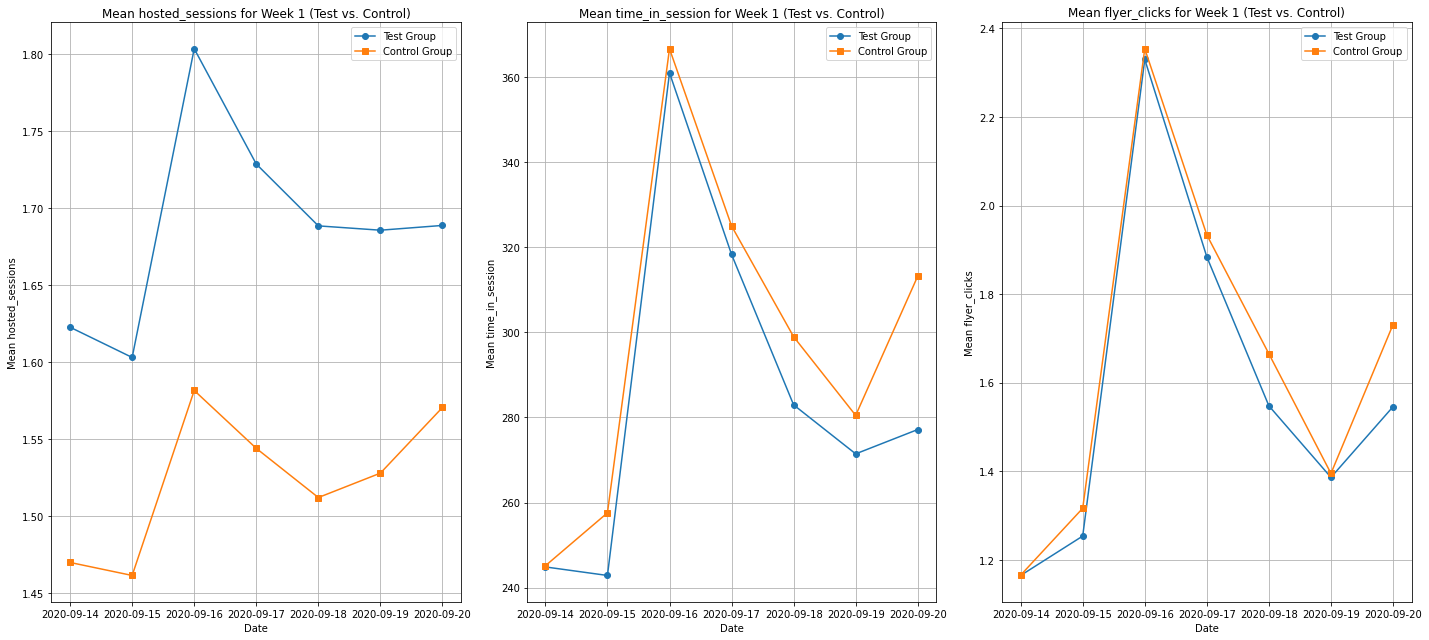

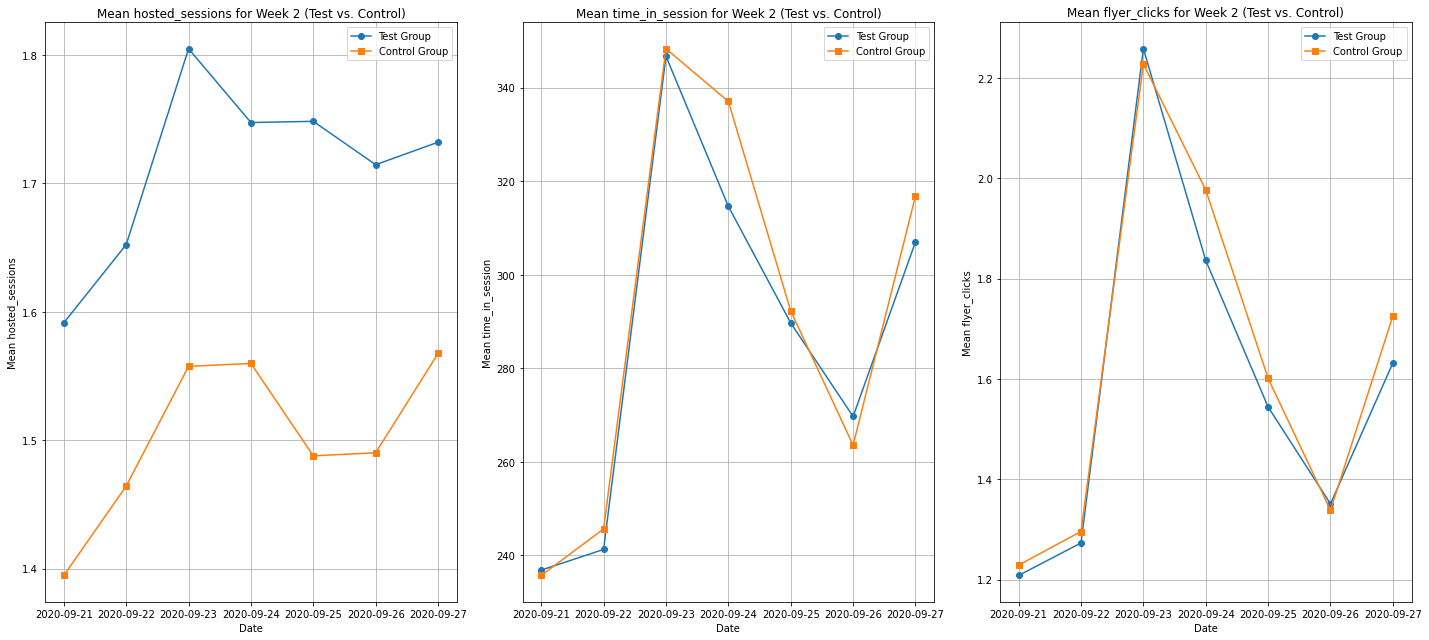

In [1207]:


# Convert 'date' and 'week_starting' columns to datetime
data['date'] = pd.to_datetime(data['date'])
data['week_starting'] = pd.to_datetime(data['week_starting'])

# Define the numerical columns you want to analyze
numerical_columns = ['hosted_sessions', 'time_in_session', 'flyer_clicks']

# Create a new column 'week_number' based on 'week_starting'
data['week_number'] = data['week_starting'].apply(lambda x: 1 if x < pd.Timestamp('2020-09-21') else 2)

# Separate data into 'test' and 'control' groups
test_data = data[data['test_treatment'] == 'test']
control_data = data[data['test_treatment'] == 'control']

# Data Visualization for all numerical columns for each week
for week_number in [1, 2]:
    # Filter data for the current week
    test_week_data = test_data[test_data['week_number'] == week_number]
    control_week_data = control_data[control_data['week_number'] == week_number]

    # Group and aggregate data by 'date' and 'test_treatment'
    test_grouped = test_week_data.groupby(['date'])[numerical_columns].mean().reset_index()
    control_grouped = control_week_data.groupby(['date'])[numerical_columns].mean().reset_index()

    # Create subplots for each numerical column
    plt.figure(figsize=(20, 9))

    for i, column in enumerate(numerical_columns):
        plt.subplot(1, len(numerical_columns), i + 1)
        plt.plot(test_grouped['date'], test_grouped[column], label='Test Group', marker='o')
        plt.plot(control_grouped['date'], control_grouped[column], label='Control Group', marker='s')
        plt.xlabel('Date')
        plt.ylabel(f'Mean {column}')
        plt.title(f'Mean {column} for Week {week_number} (Test vs. Control)')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()


In [1208]:

# Convert 'date' and 'week_starting' columns to datetime
data['date'] = pd.to_datetime(data['date'])
data['week_starting'] = pd.to_datetime(data['week_starting'])

# Define the numerical columns you want to analyze
numerical_columns = ['hosted_sessions', 'time_in_session', 'flyer_clicks']

# Create a new column 'week_number' based on 'week_starting'
data['week_number'] = data['week_starting'].apply(lambda x: 1 if x < pd.Timestamp('2020-09-21') else 2)

# Separate data into 'test' and 'control' groups
test_data = data[data['test_treatment'] == 'test']
control_data = data[data['test_treatment'] == 'control']

# Data Analysis for all numerical columns for each week
for week_number in [1, 2]:
    # Filter data for the current week
    test_week_data = test_data[test_data['week_number'] == week_number]
    control_week_data = control_data[control_data['week_number'] == week_number]

    # Calculate and print the mean values for each numerical column
    print(f"Week {week_number} - Test Group:")
    for column in numerical_columns:
        mean_value = test_week_data[column].mean()
        print(f"Mean {column}: {mean_value:.2f}")

    print(f"Week {week_number} - Control Group:")
    for column in numerical_columns:
        mean_value = control_week_data[column].mean()
        print(f"Mean {column}: {mean_value:.2f}")
    print("\n")


Week 1 - Test Group:
Mean hosted_sessions: 1.69
Mean time_in_session: 288.27
Mean flyer_clicks: 1.61
Week 1 - Control Group:
Mean hosted_sessions: 1.53
Mean time_in_session: 301.37
Mean flyer_clicks: 1.68


Week 2 - Test Group:
Mean hosted_sessions: 1.72
Mean time_in_session: 289.94
Mean flyer_clicks: 1.62
Week 2 - Control Group:
Mean hosted_sessions: 1.51
Mean time_in_session: 294.95
Mean flyer_clicks: 1.66




In [1209]:
# Separate the DataFrame into test and control groups
df2=df
test_df = df2[df2["test_treatment"] == "test"]
control_df = df2[df2["test_treatment"] == "control"]

# Group and count user statuses for test group
test_status_counts = test_df["user_status_of_week"].value_counts()

# Group and count user statuses for control group
control_status_counts = control_df["user_status_of_week"].value_counts()

# Print the counts for test group
print("Test Group User Status Counts:")
print(test_status_counts)

# Print the counts for control group
print("\nControl Group User Status Counts:")
print(control_status_counts)

Test Group User Status Counts:
returned       32532
reactivated     5651
new              779
inactive         297
churned           41
Name: user_status_of_week, dtype: int64

Control Group User Status Counts:
returned       30923
reactivated     5422
new              771
inactive         347
churned           41
Name: user_status_of_week, dtype: int64


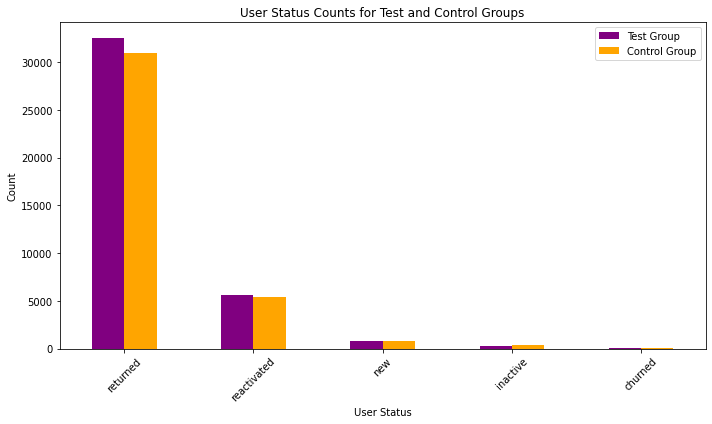

In [1210]:
# Separate the DataFrame into test and control groups
test_df = df[df["test_treatment"] == "test"]
control_df = df[df["test_treatment"] == "control"]

# Group and count user statuses for test group
test_status_counts = test_df["user_status_of_week"].value_counts()

# Group and count user statuses for control group
control_status_counts = control_df["user_status_of_week"].value_counts()

# Combine the counts into a single DataFrame
combined_counts = pd.DataFrame({
    'Test Group': test_status_counts,
    'Control Group': control_status_counts
})

# Define custom colors
colors = ['purple', 'orange']

# Create a bar plot with custom colors
combined_counts.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('User Status Counts for Test and Control Groups')
plt.xlabel('User Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()

In [1211]:
Test Group User Status Counts:
returned       32532
reactivated     5651
new              779
inactive         297
churned           41
Name: user_status_of_week, dtype: int64

Control Group User Status Counts:
returned       30923
reactivated     5422
new              771
inactive         347
churned           41

SyntaxError: invalid syntax (2717641393.py, line 1)

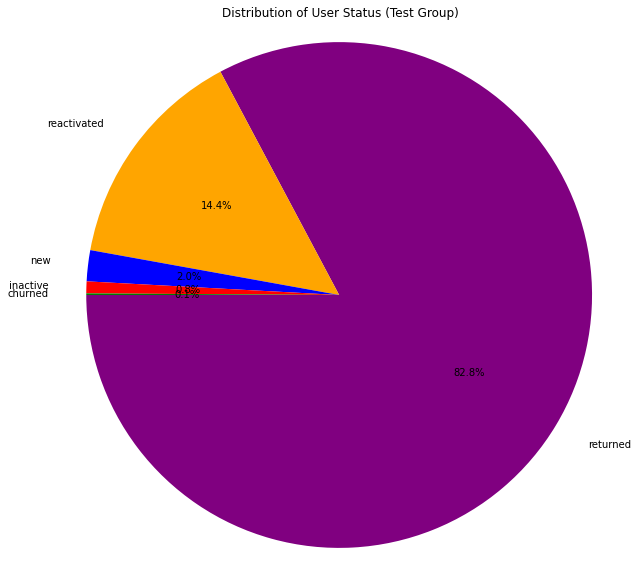

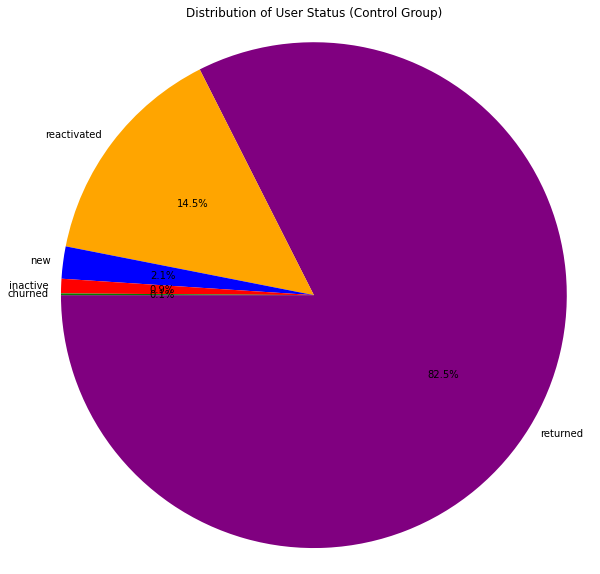

In [1212]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'user_status_of_week': [
        'returned', 'reactivated', 'new', 'inactive', 'churned'
    ],
    'Test Group': [32532, 5651, 779, 297, 41],
    'Control Group': [30923, 5422, 771, 347, 41]   }

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Set the index to 'user_status_of_week' for plotting
df.set_index('user_status_of_week', inplace=True)

# Define custom colors
colors = ['purple', 'orange', 'blue', 'red', 'green']

# Create a pie chart for the test group
plt.figure(figsize=(10, 10))
plt.pie(df['Test Group'], labels=df.index, autopct='%1.1f%%', colors=colors, startangle=180,
        labeldistance=1.15)  # Adjust labeldistance to move labels away from the center
plt.title('Distribution of User Status (Test Group)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the pie chart
plt.show()

# Create a pie chart for the control group
plt.figure(figsize=(10, 10))
plt.pie(df['Control Group'], labels=df.index, autopct='%1.1f%%', colors=colors, startangle=180,
        labeldistance=1.05)  # Adjust labeldistance to move labels away from the center
plt.title('Distribution of User Status (Control Group)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the pie chart
plt.show()


In [1213]:
results_df

,Metric,Mean (Test Group),Mean (Control Group),Better Performance
0,Hosted Sessions,1.705878,1.517571,Test group for Hosted Sessions
1,Time in Session,289.103181,298.155743,Control group for Time in Session
2,Flyer Clicks,1.615013,1.669529,Control group for Flyer Clicks


In [1251]:
import pandas as pd
import scipy.stats as stats

# Define the columns you want to perform t-tests on
columns_of_interest = ['time_in_session', 'hosted_sessions', 'flyer_clicks','zero_sessions']

# Initialize an empty DataFrame to store the results
t_test_results = pd.DataFrame(columns=['Column', 'T-statistic', 'P-value'])

# Loop through the selected columns
for column in columns_of_interest:
    control_data = df[df['test_treatment'] == 'control'][column]
    test_data = df[df['test_treatment'] == 'test'][column]
    
    t_stat, p_value = stats.ttest_ind(control_data, test_data, equal_var=False)
    
    # Define a significance level (alpha)
    alpha = 0.05
    
    # Check if the p-value is less than alpha
    if p_value < alpha:
        result = 'Statistically significant'
    else:
        result = 'Not statistically significant'
    
    # Append the results to the DataFrame
    t_test_results = t_test_results.append({'Column': column, 'T-statistic': t_stat, 'P-value': p_value, 'Result': result}, ignore_index=True)

# Print the results
print(t_test_results)

            Column T-statistic   P-value                         Result
0  time_in_session    3.397235  0.000681      Statistically significant
1  hosted_sessions  -19.905471       0.0      Statistically significant
2     flyer_clicks    3.196254  0.001393      Statistically significant
3    zero_sessions    0.983264  0.325481  Not statistically significant


C:\Users\User\AppData\Local\Temp\ipykernel_21024\3729318994.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_test_results = t_test_results.append({'Column': column, 'T-statistic': t_stat, 'P-value': p_value, 'Result': result}, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_21024\3729318994.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_test_results = t_test_results.append({'Column': column, 'T-statistic': t_stat, 'P-value': p_value, 'Result': result}, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_21024\3729318994.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_test_results = t_test_results.append({'Column': column, 'T-statistic': t_stat, 'P-value': p_value, 'Result': resul

In [1081]:
t_test_results

,Column,T-statistic,P-value,Result
0,time_in_session,3.397235,0.000681,Statistically significant
1,hosted_sessions,-19.905471,0.0,Statistically significant
2,flyer_clicks,3.196254,0.001393,Statistically significant
3,zero_sessions,0.983264,0.325481,Not statistically significant


In [1145]:
def calculate_relative_impact(test_data, control_data, column_name):
    # Calculate the sum of the column for the test and control groups
    sum_test = test_data[column_name].mean()
    sum_control = control_data[column_name].mean()
    
    # Calculate the percentage difference
    relative_impact = (sum_test - sum_control) / sum_control * 100
    
    return relative_impact

# Calculate relative impact for each numerical column
relative_impact_sessions = calculate_relative_impact(test_data, control_data, 'hosted_sessions')
relative_impact_time = calculate_relative_impact(test_data, control_data, 'time_in_session')
relative_impact_clicks = calculate_relative_impact(test_data, control_data, 'flyer_clicks')

print(f"Relative Impact for 'hosted_sessions': {relative_impact_sessions}%")
print(f"Relative Impact for 'time_in_session': {relative_impact_time}%")
print(f"Relative Impact for 'flyer_clicks': {relative_impact_clicks}%")


Relative Impact for 'hosted_sessions': 12.4084043903692%
Relative Impact for 'time_in_session': -3.0361859285175945%
Relative Impact for 'flyer_clicks': -3.2653445712983835%


In [ ]:

# Assuming your dataset is loaded into a DataFrame called 'df'

# Group the data by 'test_treatment' and sum the 'zero_sessions' column
zero_sessions_counts = df.groupby('test_treatment')['zero_sessions'].sum().reset_index()

# Now, 'zero_sessions_counts' contains the counts of zero sessions for each group

In [1079]:
zero_sessions_counts

,test_treatment,zero_sessions
0,control,2572
1,test,2617


In [1148]:
import pandas as pd

# Define a function to calculate relative impact
def calculate_relative_impact(test_data, control_data, column_name):
    # Calculate the mean of the column for the test and control groups
    mean_test = test_data[column_name].mean()
    mean_control = control_data[column_name].mean()
    
    # Calculate the percentage difference
    relative_impact = (mean_test - mean_control) / mean_control * 100
    
    return relative_impact

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Column Name', 'Relative Impact (%)'])

# Calculate relative impact for each numerical column
relative_impact_sessions = calculate_relative_impact(test_data, control_data, 'hosted_sessions')
relative_impact_time = calculate_relative_impact(test_data, control_data, 'time_in_session')
relative_impact_clicks = calculate_relative_impact(test_data, control_data, 'flyer_clicks')
relative_impact_zero = calculate_relative_impact(test_data, control_data, 'zero_sessions')

# Append the results to the DataFrame
results_df = results_df.append({'Column Name': 'hosted_sessions', 'Relative Impact (%)': relative_impact_sessions}, ignore_index=True)
results_df = results_df.append({'Column Name': 'time_in_session', 'Relative Impact (%)': relative_impact_time}, ignore_index=True)
results_df = results_df.append({'Column Name': 'flyer_clicks', 'Relative Impact (%)': relative_impact_clicks}, ignore_index=True)
results_df = results_df.append({'Column Name': 'zero_sessions', 'Relative Impact (%)': relative_impact_zero}, ignore_index=True)

# Print the results as a table
print(results_df)


       Column Name Relative Impact (%)
0  hosted_sessions           12.408404
1  time_in_session           -3.036186
2     flyer_clicks           -3.265345
3    zero_sessions            -2.90032


C:\Users\User\AppData\Local\Temp\ipykernel_21024\1875702157.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Column Name': 'hosted_sessions', 'Relative Impact (%)': relative_impact_sessions}, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_21024\1875702157.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Column Name': 'time_in_session', 'Relative Impact (%)': relative_impact_time}, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_21024\1875702157.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Column Name': 'flyer_clicks', 'Relative Impact (%)': relative_impact_clicks}, ignore_index=True

In [1150]:
import pandas as pd
import numpy as np

# Define a function to calculate Cohen's d
def calculate_cohens_d(group1_data, group2_data):
    mean_group1 = np.mean(group1_data)
    mean_group2 = np.mean(group2_data)
    pooled_std_dev = np.sqrt(((len(group1_data) - 1) * np.var(group1_data) + (len(group2_data) - 1) * np.var(group2_data)) / (len(group1_data) + len(group2_data) - 2))
    cohen_d = (mean_group1 - mean_group2) / pooled_std_dev
    return cohen_d

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Column Name', "Cohen's d"])

# Calculate Cohen's d for each numerical column
cohen_d_sessions = calculate_cohens_d(test_data['hosted_sessions'], control_data['hosted_sessions'])
cohen_d_time = calculate_cohens_d(test_data['time_in_session'], control_data['time_in_session'])
cohen_d_clicks = calculate_cohens_d(test_data['flyer_clicks'], control_data['flyer_clicks'])
cohen_d_zero = calculate_cohens_d(test_data['zero_sessions'], control_data['zero_sessions'])

# Append the results to the DataFrame
results_df = results_df.append({'Column Name': 'hosted_sessions', "Cohen's d": cohen_d_sessions}, ignore_index=True)
results_df = results_df.append({'Column Name': 'time_in_session', "Cohen's d": cohen_d_time}, ignore_index=True)
results_df = results_df.append({'Column Name': 'flyer_clicks', "Cohen's d": cohen_d_clicks}, ignore_index=True)
results_df = results_df.append({'Column Name': 'zero_sessions', "Cohen's d": cohen_d_zero}, ignore_index=True)

# Print the results as a table
print(results_df)


       Column Name Cohen's d
0  hosted_sessions  0.142922
1  time_in_session -0.024543
2     flyer_clicks -0.023071
3    zero_sessions -0.007107


C:\Users\User\AppData\Local\Temp\ipykernel_21024\850269782.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Column Name': 'hosted_sessions', "Cohen's d": cohen_d_sessions}, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_21024\850269782.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Column Name': 'time_in_session', "Cohen's d": cohen_d_time}, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_21024\850269782.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Column Name': 'flyer_clicks', "Cohen's d": cohen_d_clicks}, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_21024\850269

In [1151]:
results_df

,Column Name,Cohen's d
0,hosted_sessions,0.142922
1,time_in_session,-0.024543
2,flyer_clicks,-0.023071
3,zero_sessions,-0.007107
